In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_x, tau_y, tau_z, tau_0 = sigma_x, sigma_y, sigma_z, I2

# Parameters
g1, g2 = 0.5, -0.5

Nk = 301

kzs = np.linspace(-np.pi,np.pi, Nk)
kx, ky = 0, 0

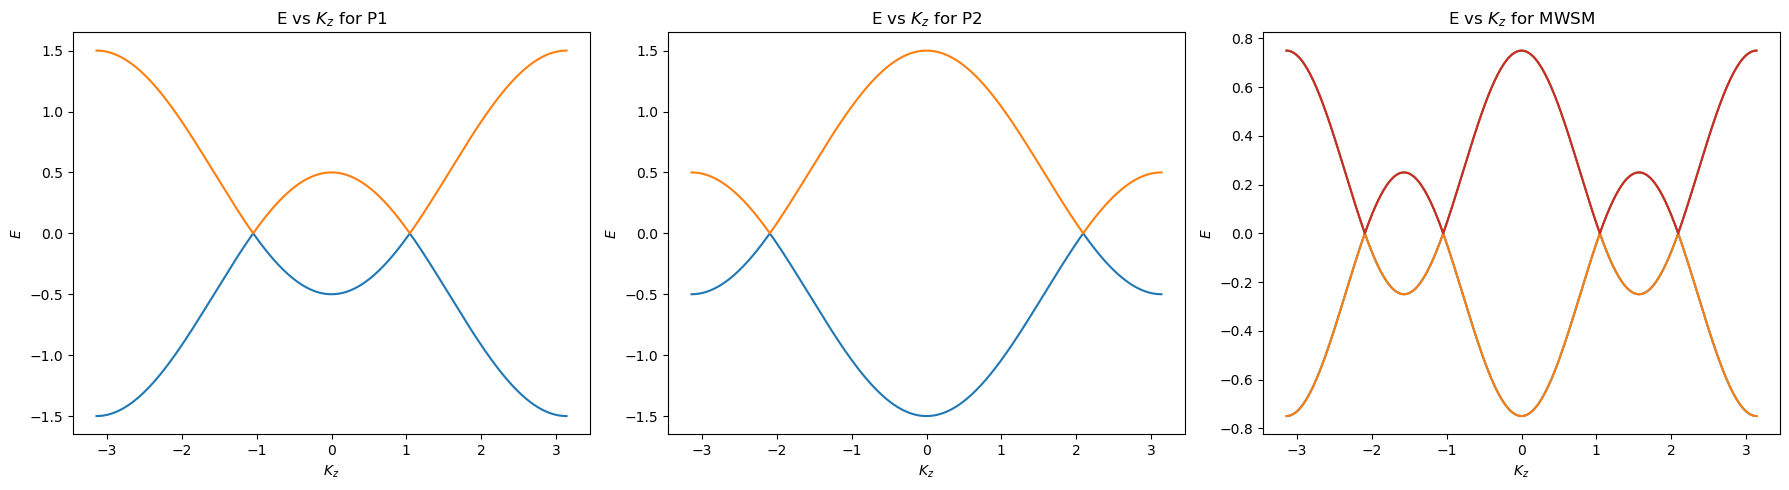

In [12]:
# Band structure for child hamiltonian from Parents 1 and 2 (below)  

# Parent WSM Hamiltonians 
evals_P1 = []
evals_P2 = []
evals_child = []
evals_child_broken = []

for kz in kzs:
    H_P1 = np.sin(kx)*tau_x+np.sin(ky)*tau_y+(2+g1-np.cos(kx)-np.cos(ky)-np.cos(kz))*tau_z
    H_P2 = -np.sin(kx)*sigma_x+np.sin(ky)*sigma_y-(2+g2-np.cos(kx)-np.cos(ky)-np.cos(kz))*sigma_z
    
    H_child = np.kron (H_P1, H_P2)


    eigenvals_P1 = np.linalg.eigvalsh(H_P1)
    eigenvals_P2 = np.linalg.eigvalsh(H_P2)
    eigenvals_child = np.linalg.eigvalsh(H_child)

    evals_P1.append (eigenvals_P1)
    evals_P2.append (eigenvals_P2)
    evals_child.append (eigenvals_child)
    

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Parent 1
axs[0].plot(kzs, evals_P1)
axs[0].set_xlabel('$K_z$')
axs[0].set_ylabel('$E$')
axs[0].set_title("E vs $K_z$ for P1")

# Parent 2
axs[1].plot(kzs, evals_P2)
axs[1].set_xlabel('$K_z$')
axs[1].set_ylabel('$E$')
axs[1].set_title("E vs $K_z$ for P2")

# MWSM (Child)
axs[2].plot(kzs, evals_child)
axs[2].set_xlabel('$K_z$')
axs[2].set_ylabel('$E$')
axs[2].set_title("E vs $K_z$ for MWSM")

plt.tight_layout()

plt.show()